# 회전

## 방법1 : cv2.rotate() 사용
`cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)`
- cv2.ROTATE_90_CLOCKWISE : 시계 방향으로 회전
- v2.ROTATE_180 : 시계 방향으로 회전
- cv2.ROTATE_90_COUNTERCLOCKWISE : 시계 반대방향으로 회전

- 정해진 각도(90도 단위)로만 회전이 가능


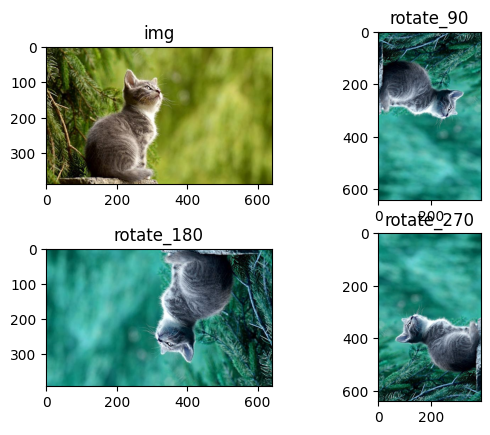

In [2]:
import cv2
import matplotlib.pyplot as plt

img_file = '../cv_images/img.jpg'
img = cv2.imread(img_file)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR -> RGB 변환

rotate_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE) # 시계 방향으로 회전
rotate_180 = cv2.rotate(img, cv2.ROTATE_180)   # 코드입력 # 시계 방향으로 회전
rotate_270 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE) # 시계 반대방향으로 회전

plt.subplot(221), plt.imshow(img_rgb), plt.title('img')
plt.subplot(222), plt.imshow(rotate_90), plt.title('rotate_90')     
plt.subplot(223), plt.imshow(rotate_180), plt.title('rotate_180')   
plt.subplot(224), plt.imshow(rotate_270), plt.title('rotate_270')
plt.show()

# cv2.imshow('img', img)
# cv2.imshow('rotate_90', rotate_90)
# cv2.imshow('rotate_180', rotate_180)
# cv2.imshow('rotate_270', rotate_270)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

## 방법2 : 회전변환행렬 (cv2.getRotationMatrix2D()) 사용
- 회전의 중심, 각도, 스케일링을 정확하게 제어, 복잡한 변환 요구사항이 있을 때 적합

회전(Rotate)은 선형 변환 중 하나에 포함되며, 회전 변환 행렬(Rotation matrix)을 통해 변환이 진행

`matrix = cv2.getRotationMatrix2D(center, angle, scale)` : 중심점(center), 각도(angle), 비율(scale)로 매핑 변환 행렬(matrix)을 생성

- 중심점(center) :튜플(Tuple) 형태로 사용하며 회전의 기준점을 설정
- 각도(angle) : 중심점을 기준으로 회전할 각도를 설정
- 비율(scale) : 이미지의 확대 및 축소 비율을 설정

`dst = cv2.warpAffine(src, M, dsize)` : 원본 이미지(src)에 M(아핀 맵 행렬)을 적용하고 출력 이미지 크기(dsize)로 변형해서 출력 이미지(dst)를 반환

- 아핀 맵 행렬(M)은 회전 행렬 생성 함수에서 반환된 매핑 변환 행렬을 사용
- 출력 이미지 크기(dsize)는 튜플(Tuple) 형태로 사용하며 출력 이미지의 너비와 높이를 의미
- 아핀 맵 행렬에 따라 회전된 이미지를 반환

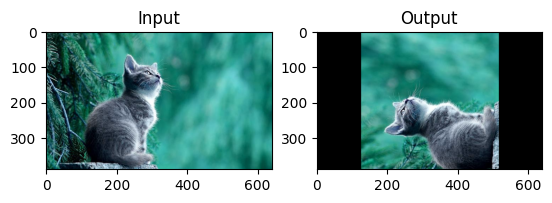

In [3]:
import cv2
import matplotlib.pyplot as plt

img_file = '../cv_images/img.jpg'
img = cv2.imread(img_file)

height, width, channel = img.shape
matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
dst = cv2.warpAffine(img, matrix, (width, height))

plt.subplot(121), plt.imshow(img), plt.title('Input')
plt.subplot(122), plt.imshow(dst), plt.title('Output')
plt.show()

# cv2.imshow("img", img)
# cv2.imshow("dst", dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()